# Practical Demonstration for Presentation

In this script I will demonstrate how you can perform your own sentiment analysis. I will manipulate a bit of data on movie reviews and then train a model to classify the review as positive or negative. At the end, you will be able to use this to build new sentiment analysis models.

In [6]:
# We start with importing the packages that will be used through out
import nltk, random
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# The movie_reviews data set in the NLTK Corpus has two main variables we are looking for:
## categories - indicates whether the review is positive or negative
## words - the content of the review

reviews = [(list(movie_reviews.words(fileid)),category)
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]

# The seed records the randomization of the shuffle, we do this so that results can be replecated 
random.seed(708)
random.shuffle(reviews) # randomize order of reviews to have random split of pos/neg reviews in train/test


### Splitting Data for Modeling

The code below takes the data we have transformed in the first part and splits it into two seperate sets. The first is for training the model, and then next is for testing the model.

In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews, test_size = 0.35, random_state=42) # split our data into train/test

# Defining the train/test data
X_train = [' '.join(words) for (words,label) in train]
X_test = [' '.join(words) for (words,label) in test]
y_train = [label for (words,label) in train]
y_test = [label for (words,label) in test]

### Vectorizing 

Vectorizing is the key in having a functioning NLP model. This process takes all of the words in a text and transforms them into a vector of 1's and 0's. The computer will be able to understand the input afterwards. There are a couple of ways to do this with different algorithms such as: Bag of Words, TF-IDF

What each of these methods aims to accomplish is to look for key words within each text. Certain words appear very consistently accross texts and the algorithm will work to remove the importance of these words. Examples of such words are: 'of','the','in','to','at', etc.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidVector = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidVector.fit_transform(X_train)
X_test_bow = tfidVector.transform(X_test)

### Model

There are many models that can be applied to NLP and there are benefits to each one. In this case I ran it with a logistical regression as the idea behind it is very intuitive. It estimates the probability of an event occuring, and in our case, will show if the text is positive or negative.

In [32]:
from sklearn.linear_model import LogisticRegression

# Import the model that will be used to predict sentiment of the review, I chose logit with no particular reason
logit = LogisticRegression()
logit.fit(X_train_bow, y_train)

print(logit.score(X_test_bow, y_test))

0.8085714285714286


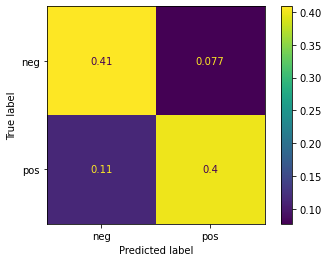

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Plot of a matrix to show how consistent the model is
plot_confusion_matrix(logit, X_test_bow, y_test, normalize='all')